In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('/content/drive/MyDrive/keypoints_final_256.csv')
df_test = pd.read_csv('/content/drive/MyDrive/keypoints_final_test_256.csv')

In [4]:
df = df.drop('Unnamed: 0',1)
df_test = df_test.drop('Unnamed: 0',1)

<ipython-input-4-2408e182c2cf>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0',1)
<ipython-input-4-2408e182c2cf>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('Unnamed: 0',1)


In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,1.1
0,0.561012,0.302157,-0.123826,0.564638,0.289460,-0.105465,0.567299,0.289761,-0.105632,0.569772,...,0.533098,0.883884,0.116445,0.566635,0.933335,0.036987,0.536138,0.938561,-0.000178,tadasana
1,0.561800,0.300378,-0.112502,0.564178,0.286860,-0.094147,0.566694,0.287539,-0.094309,0.568935,...,0.532270,0.883887,0.118631,0.570173,0.931963,0.035905,0.532538,0.933740,-0.001898,tadasana
2,0.561128,0.303233,-0.398081,0.564855,0.286085,-0.388905,0.567303,0.285346,-0.389124,0.569531,...,0.527861,0.878289,0.133518,0.566152,0.918341,0.058699,0.534654,0.928207,-0.001211,tadasana
3,0.560880,0.309663,-0.300727,0.564582,0.291333,-0.289611,0.567254,0.290768,-0.289883,0.570002,...,0.536183,0.912010,0.188811,0.567818,0.914286,0.152388,0.530323,0.931029,0.077729,tadasana
4,0.561824,0.313649,-0.342597,0.565599,0.294846,-0.333475,0.568605,0.294382,-0.333750,0.571083,...,0.540910,0.887583,0.192771,0.571397,0.923574,0.116451,0.531012,0.930395,0.070042,tadasana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,0.486648,0.286260,-0.089110,0.490879,0.273558,-0.067470,0.493832,0.272559,-0.067595,0.497064,...,0.470475,0.872472,0.102894,0.496999,0.912968,0.022522,0.466042,0.915865,-0.025367,tadasana
13125,0.482443,0.300422,-0.362747,0.487832,0.286010,-0.350695,0.491121,0.285521,-0.350950,0.493022,...,0.474411,0.877378,0.126974,0.494784,0.912487,0.072589,0.465412,0.914555,0.006590,tadasana
13126,0.480868,0.294958,-0.321305,0.485442,0.280226,-0.312262,0.488200,0.280182,-0.312505,0.491096,...,0.473303,0.876180,0.188003,0.495985,0.914854,0.099370,0.465068,0.916696,0.075990,tadasana
13127,0.476346,0.293068,-0.347669,0.480525,0.276444,-0.338560,0.483666,0.276016,-0.338818,0.485902,...,0.473899,0.877159,0.200288,0.494451,0.915021,0.085202,0.464427,0.913910,0.084059,tadasana


In [6]:
a = df.iloc[0].values

In [7]:
a

array([0.5610121488571167, 0.3021573722362518, -0.1238261461257934,
       0.5646376013755798, 0.2894602119922638, -0.1054650172591209,
       0.5672987103462219, 0.2897613942623138, -0.105631947517395,
       0.569772481918335, 0.2902835011482239, -0.1055463477969169,
       0.5565555095672607, 0.2891682088375091, -0.1058596149086952,
       0.5539022088050842, 0.2893290519714355, -0.1060997918248176,
       0.5510416030883789, 0.2895386219024658, -0.1061554849147796,
       0.5705021023750305, 0.2935670912265777, -0.0114558367058634,
       0.5456047654151917, 0.2917241752147674, -0.0138909174129366,
       0.5649600028991699, 0.3148797452449798, -0.0862689837813377,
       0.556268036365509, 0.3145413994789123, -0.0888205915689468,
       0.5886379480361938, 0.3434101343154907, 0.0246982872486114,
       0.5274155139923096, 0.3412458002567291, 0.0200451966375112,
       0.6256014108657837, 0.2626210749149322, -0.0154260154813528,
       0.5001486539840698, 0.2479017525911331, -0.020

In [8]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder

In [9]:
lbe = LabelEncoder()
df['1.1']= lbe.fit_transform(df['1.1'])
df_test['1.1']= lbe.fit_transform(df_test['1.1'])
dict(zip(lbe.classes_, lbe.transform(lbe.classes_)))

{'bhujan': 0, 'padmasan': 1, 'shav': 2, 'tadasana': 3, 'trik': 4, 'vriksh': 5}

In [10]:
target = ['bhujan', 'padmasan', 'shav', 'tadasana','trik', 'vriksh' ]

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [12]:
device

'cpu'

In [13]:
class YogaDataset(Dataset):
  def __init__(self, df):
    self.features = df.drop(['1.1'], axis=1)
    self.target = df['1.1']

  def __len__(self):
    return len(self.features)
  
  def __getitem__(self, index):
    features = self.features.loc[index]
    target = self.target[index]
    return torch.tensor(features.tolist()).float().to(device), torch.tensor(target).long().to(device)

In [14]:
# df_feat = df.drop(['1.1'], axis=1)

In [15]:
device

'cpu'

In [16]:
# target = df['1.1']

In [17]:
data = YogaDataset(df)

In [18]:
feat, target = data[100]

In [19]:
target

tensor(3)

In [20]:
class LSTMModel(nn.Module):
  def __init__(self,hidden_dim=80, input_dim=99,  n_layers=1):
    super(LSTMModel, self).__init__()
    self.input_dim = input_dim
    self.n_layers = n_layers
    self.hidden_dim = hidden_dim
    self.rnn = nn.LSTM(input_dim,hidden_dim, n_layers, batch_first=True)
    self.fc = nn.Linear(hidden_dim, 64)
    self.relu1  = nn.ReLU()
    self.fc1 = nn.Linear(64,20)
    self.relu2  = nn.ReLU()
    self.fc2 = nn.Linear(20,6) 
  def forward(self, input):
    h0 = torch.zeros(self.n_layers,  self.hidden_dim)
    c0 = torch.zeros(self.n_layers,  self.hidden_dim)
    out,( _,_) = self.rnn(input,(h0, c0))
    pred = self.fc(out)
    pred = self.relu1(pred)
    pred = self.fc1(pred)
    pred = self.relu2(pred)
    pred = self.fc2(pred)
    output = nn.Softmax( dim=1)(pred)
    return output

In [21]:
model = LSTMModel().to(device)

In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [23]:

model

LSTMModel(
  (rnn): LSTM(99, 80, batch_first=True)
  (fc): Linear(in_features=80, out_features=64, bias=True)
  (relu1): ReLU()
  (fc1): Linear(in_features=64, out_features=20, bias=True)
  (relu2): ReLU()
  (fc2): Linear(in_features=20, out_features=6, bias=True)
)

In [25]:
!pip install torchinfo
import torchinfo
torchinfo.summary(model, input_size=(80, 99), device="cpu")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
LSTMModel                                [80, 6]                   --
├─LSTM: 1-1                              [80, 80]                  57,920
├─Linear: 1-2                            [80, 64]                  5,184
├─ReLU: 1-3                              [80, 64]                  --
├─Linear: 1-4                            [80, 20]                  1,300
├─ReLU: 1-5                              [80, 20]                  --
├─Linear: 1-6                            [80, 6]                   126
Total params: 64,530
Trainable params: 64,530
Non-trainable params: 0
Total mult-adds (M): 371.22
Input size (MB): 0.03
Forward/backward pass size (MB): 0.11
Params size (MB): 0.26
Estimated Total Size (MB): 0.40

In [27]:
!pip install torchviz
from torchviz import make_dot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=42610687e96322eaa8b814d07414b37b94dee495fcf0e757f58799edadca060b
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [76]:
y = model(bib)
make_dot(y.mean(), params=dict(model.named_parameters())).render("rnn_torchviz", format="png")


'rnn_torchviz.png'

'tadasana'

In [56]:
def get_data():
    train = YogaDataset(df)
    test = YogaDataset(df_test)
    trn_dl = DataLoader(train, batch_size=32,shuffle=True, drop_last=True)
    test_dl = DataLoader(test, batch_size=32, shuffle=True, drop_last=True)
    return trn_dl, test_dl

In [31]:
trn_ldr, test_ldr = get_data()
# for x in trn_ldr:
#   print(x)
#   break

In [32]:
def train_batch(x, y, model, loss_fn, opt):
    model.train()
    prediction = model(x)
    # print(y.shape)
    # print(y)
    # print(prediction.shape)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [33]:
@torch.no_grad()
def accuracy(x, y, model, test=False):
    model.eval()
    pred = model(x)
    _, is_correct = torch.max(pred.data,1)
    acc_all = (is_correct==y).detach().cpu().numpy()
    if test==True:
      return acc_all, is_correct
    else:
      return acc_all

In [34]:
@torch.no_grad()
def val_loss_trn(x, y, model, loss_fn):
  prediction = model(x)
  val_loss = loss_fn(prediction, y)
  return val_loss.item()

In [71]:
poses_json = {
    0:"bhujan",
    1:"padmasan",
    2:"shav",
    3:"tadasana",
    4:"trik",
    5:"vriksh"
}


Epoch: _________*****0*****_______
Epoch: _________*****0 Training Loss : 1.0818094628613169 *****_______
Epoch: _________*****0 Training Accuracy: 0.973094512195122 *****_______
Epoch: _________*****0 Validation Loss : 1.0715227843998196 *****_______
Epoch: _________*****0 Validation Accuracy. 0.9779283216783217 *****_______




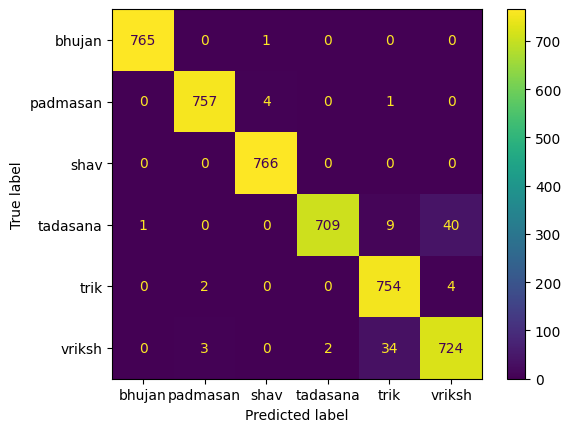

              precision    recall  f1-score   support

      bhujan       1.00      1.00      1.00       766
    padmasan       0.99      0.99      0.99       762
        shav       0.99      1.00      1.00       766
    tadasana       1.00      0.93      0.96       759
        trik       0.94      0.99      0.97       760
      vriksh       0.94      0.95      0.95       763

    accuracy                           0.98      4576
   macro avg       0.98      0.98      0.98      4576
weighted avg       0.98      0.98      0.98      4576



In [72]:
train_loss = []
train_accuracies= []
val_loss = [] 
val_accuracies = []

for i in range(1):
    y_pred= []
    y_true = []
    print(f'Epoch: _________*****{i}*****_______')
    train_epoch_losses, train_epoch_accuracies = [], []
    val_epoch_accuracies, val_epoch_losses = [], []



    for ix, batch in (enumerate(iter(trn_ldr))):
        x, y = batch
        bib = x
        train_epoch_losses.append(train_batch(x, y, model, loss_fn, optimizer))
    train_epoch_loss = np.array(train_epoch_losses).mean()
    print(f'Epoch: _________*****{i} Training Loss : {train_epoch_loss} *****_______')



    for ix, batch in (enumerate(iter(trn_ldr))):
        x, y = batch
        # x = x.permute(0, 3,1,2)
        train_epoch_accuracies.append(sum(accuracy(x, y, model)) / len(y))
    train_epoch_accuracy = np.array(train_epoch_accuracies).mean()
    print(f'Epoch: _________*****{i} Training Accuracy: {train_epoch_accuracy} *****_______')


    for ix, batch in (enumerate(iter(test_ldr))):
        x, y = batch
        # x = x.permute(0, 3,1,2)
        val_epoch_losses.append(val_loss_trn(x, y, model, loss_fn))
    val_epoch_loss = np.array(val_epoch_losses).mean()
    print(f'Epoch: _________*****{i} Validation Loss : {val_epoch_loss} *****_______')

    for ix, batch in (enumerate(iter(test_ldr))):
        x, y = batch
        # x = x.permute(0, 3,1,2)
        y_true.append(y.tolist())
        test_acc_return  = accuracy(x, y, model, test=True)[0].tolist()
        y_pred.append(accuracy(x, y, model, test=True)[1])
        val_epoch_accuracies.append(sum(test_acc_return) / len(y))
    val_epoch_accuracy = np.array(val_epoch_accuracies).mean()
    print(f'Epoch: _________*****{i} Validation Accuracy. {val_epoch_accuracy} *****_______')
    print('\n')


    all_y_true = []
    for x in y_true:
      for y in x:

        all_y_true.append(poses_json[y])

    all_y_pred = []
    for x in y_pred:
      # print(x)
      for y in x:
        all_y_pred.append(poses_json[y.item()])
    # print(all_y_true, all_y_pred)
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
    cm = confusion_matrix(all_y_true, all_y_pred, labels = ['bhujan', 'padmasan', 'shav', 'tadasana','trik', 'vriksh' ])
    disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bhujan', 'padmasan', 'shav', 'tadasana','trik', 'vriksh' ])
    disp.plot()
    import matplotlib.pyplot as plt
    plt.show()
    print(classification_report(all_y_true, all_y_pred,labels = ['bhujan', 'padmasan', 'shav', 'tadasana','trik', 'vriksh' ]))

    train_loss.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_accuracies.append(val_epoch_accuracy)
    val_loss.append(val_epoch_loss)

In [ ]:
all_y_true = []
for x in y_true:
  for y in x:
    all_y_true.append(poses_json[y])

all_y_pred = []
for x in y_pred:
  for y in x:
    all_y_pred.append(poses_json[y.item()])

In [ ]:
# [all_y_true.append(y) for y in x in y_true]

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_style("darkgrid")
# plt.figure(figsize=(12,8))
colors = ["#807fff", "#fd7f82", "#84a97e"]
sns.set_palette(sns.color_palette(colors))
cm = confusion_matrix(all_y_true, all_y_pred,labels = ['bhujan', 'padmasan', 'shav', 'tadasana','trik', 'vriksh' ])
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bhujan', 'padmasan', 'shav', 'tadasana','trik', 'vriksh' ])
# import matplotlib.pyplot as plt
disp.plot()
# plt.show()

In [ ]:
print(classification_report(all_y_true, all_y_pred,labels = ['bhujan', 'padmasan', 'shav', 'tadasana','trik', 'vriksh' ]))

In [ ]:
df_val = pd.read_csv('/content/drive/MyDrive/keypoints_final_val_256.csv').drop('Unnamed: 0',1)

In [ ]:
df_val[512:(512+256)]

In [ ]:
tad =  df_val[512:512+256]
tad= tad.reset_index( drop=True)
# tad_feat = tad.drop('1.1',1)

In [ ]:
class YogaDataset(Dataset):
  def __init__(self, df):
    self.features = df.drop(['1.1'], axis=1)
    self.target = df['1.1']

  def __len__(self):
    return len(self.features)
  
  def __getitem__(self, index):
    features = self.features.loc[index]
    target = self.target[index]
    return torch.tensor(features.tolist()).float().to(device)

In [ ]:
tad = YogaDataset(tad)
tad_dl = DataLoader(tad, batch_size=16,drop_last=False)

In [ ]:
for batch in tad_dl:
  
  pred=(model(batch))
  _, is_correct = torch.max(pred.data,1)
  print(is_correct)

In [ ]:
{'bhujan': 0, 'padmasan': 1, 'shav': 2, 'tadasana': 3, 'trik': 4, 'vriksh': 5}

In [ ]:
val_accuracies

In [ ]:
epochs = np.arange(25)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(12,8))
colors = ["#807fff", "#fd7f82", "#84a97e"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(x=epochs, y=val_accuracies , label='Validation Accuracy')
sns.lineplot(x=epochs, y=train_accuracies , label='Training accuracy')
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
sns.set_style("darkgrid")

plt.xlabel('epochs')
plt.ylabel('Accuracy in 100%')
plt.title('Training and Validation Accuracy with increasing epochs (ADAM Optimizer)')
plt.legend()
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.grid('off')
plt.show()

In [ ]:
epochs = np.arange(25) + 1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
colors = ["#807fff", "#fd7f82", "#84a97e"]
sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid")

plt.plot(epochs,  val_loss, label='Validation Loss')
plt.plot(epochs, train_loss, label='Training Loss')
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
plt.title('Training and Validaiton Loss with incresing epoch (ADAM Optimizer)')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in plt.gca().get_yticks()])
plt.grid('off')
plt.show()

In [ ]:

# from google.colab import drive
# drive.mount('/content/drive')

file_path = ''

from glob import glob
import pandas as pd
import cv2 as cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import torch
from sklearn.model_selection import train_test_split
# !pip install mediapipe


import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

BG_COLOR = (192, 192, 192)
def landmark_det(image):
  with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
    a = []
    image_height, image_width, _ = image.shape
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for i in range(33):
      a.append((results.pose_landmarks.landmark[mp_pose.PoseLandmark(i)].x ,results.pose_landmarks.landmark[mp_pose.PoseLandmark(i)].y ,results.pose_landmarks.landmark[mp_pose.PoseLandmark(i)].z))
    b = []

    for i in a:
      for x in i:
        b.append(x)
    df = pd.DataFrame(b).T
    df = df.to_numpy()
    return df


import os


def listframe(path):
  local = []
  video = cv2.VideoCapture(path)
  frame_num = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
  f_img = 0
  count = 0
  while (count<frame_num): 
      try:
              success, cap = video.read()
          # if count % (int(frame_num / 256)) == 0 and (f_img<256):
              df  = landmark_det(cap)
              local.append(df)
              f_img =f_img+1
              count = count+1
          # else:
          #     count = count+1
      except:
             count = count+1
  print(f'done dong doing {path}')

  return local




In [ ]:
data = np.array(listframe("/content/1_02.mp4"))
globals = []
for i in range(len(data)):
    for j in range(len(data[i])):
        globals.append(data[i][j])


In [ ]:
class YogaDataset(Dataset):
  def __init__(self, df):
    self.features = df
    # self.target = df['1.1']

  def __len__(self):
    return len(self.features)
  
  def __getitem__(self, index):
    features = self.features.loc[index]
    # target = self.target[index]
    return torch.tensor(features.tolist()).float().to(device)

In [ ]:
total = []
for i in range(len(globals)):
  total.append((globals[i]))

df_test = pd.DataFrame(globals)



tad = YogaDataset(df_test)
tad_dl = DataLoader(tad, batch_size=16,drop_last=False)
for batch in tad_dl:
  
  pred=(model(batch))

  _, is_correct = torch.max(pred.data,1)
  print(is_correct)


In [ ]:
# torch.save(model.to('cpu').state_dict(), 'yoga_fulldatamodel_test.pth')

In [ ]:
is_correct